# NEURAL NETWORKS [using PyTorch]

**Description**.

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. The networks are built from individual parts approximating neurons, typically called units or simply “neurons.” Each unit has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit’s output.

**Types of Nodes in a Neural Network:**
* Input Units — Provides information from the outside world to the network and are together referred to as the “Input Layer”. These nodes do not perform any computation, they just pass on the information to the hidden nodes.
* Hidden Units — These nodes do not have any direct connection with the outside world. They perform computations and transfer information from Input nodes to Output nodes. A collection of hidden nodes forms a “Hidden Layer”. While a feed-forward network will only have a single input layer and a single output layer, it can have zero or multiple Hidden Layers.
* Output Units — The Output nodes are collectively referred to as the “Output Layer” and are responsible for computations and transferring information from the network to the outside world.

![nn](img/1_HWhBextdDSkxYvz0kEMTVg.png)

In [129]:
import pandas as pd
import numpy as np 

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_boston

A fully-connected ReLU network with one hidden layer, trained to predict y from x
by minimizing squared Euclidean distance.
This implementation uses the nn package from PyTorch to build the network.
PyTorch autograd makes it easy to define computational graphs and take gradients,
but raw autograd can be a bit too low-level for defining complex neural networks;
this is where the nn package can help. The nn package defines a set of Modules,
which you can think of as a neural network layer that has produces output from
input and may have some trainable weights or other state.

In [121]:
device = torch.device('cpu')
# device = torch.device('cuda') # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
D_in, H, D_out =  4, 10, 1
# N, D_in, H, D_out = 64, 1000, 100, 10 # for synthetic data


#  Data loading

In [122]:
# from sklearn (more https://scikit-learn.org/stable/datasets/index.html)
df_iris = load_iris()
x = torch.Tensor(df_iris.data).float()
y = torch.Tensor(df_iris.target.reshape(-1,1)).float()

# Create random Tensors to hold inputs and outputs
# x = torch.randn(N, D_in, device=device)
# y = torch.randn(N, D_out, device=device)


In [123]:
print(x.shape, y.shape)

torch.Size([150, 4]) torch.Size([150, 1])


# Model creating

Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.
After constructing the model we use the .to() method to move it to the desired device.

In [124]:

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
#           torch.nn.LogSoftmax(dim = 1)
        ).to(device)



# Model fitting

The nn package also contains definitions of popular loss functions; in this case we will use Mean Squared Error (MSE) as our loss function. Setting
reduction='sum' means that we are computing the *sum* of squared errors rather
than the mean; this is for consistency with the examples above where we
manually compute the loss, but in practice it is more common to use mean
squared error as a loss by setting reduction='elementwise_mean'.

In [125]:
list_loss = []
loss_fn = torch.nn.MSELoss(reduction='sum')
# loss_fn = torch.nn.NLLLoss() 

learning_rate = 1e-5
for t in range(500):
# Forward pass: compute predicted y by passing x to the model. Module objects
# override the __call__ operator so you can call them like functions. When
# doing so you pass a Tensor of input data to the Module and it produces
# a Tensor of output data.
    y_pred = model(x)

# Compute and print loss. We pass Tensors containing the predicted and true
# values of y, and the loss function returns a Tensor containing the loss.
    loss = loss_fn(y_pred, y)
    list_loss.append(loss)
    
#   print(t, loss.item())
  
# Zero the gradients before running the backward pass.
    model.zero_grad()

# Backward pass: compute gradient of the loss with respect to all the learnable
# parameters of the model. Internally, the parameters of each Module are stored
# in Tensors with requires_grad=True, so this call will compute gradients for
# all learnable parameters in the model.
    loss.backward()

# Update the weights using gradient descent. Each parameter is a Tensor, so
# we can access its data and gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad


# Error analysis 

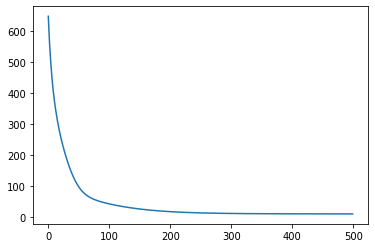

In [130]:
plt.plot(list_loss)

# List of links to more detailed sources, tutorials, and alternative solutions

* https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
* https://github.com/jcjohnson/pytorch-examples/blob/master/nn/two_layer_net_nn.py - this example
* https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a  - the simplest example